# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy import stats
from scipy.stats import linregress
from pprint import pprint
from datetime import date

# Import API key
from config import owm_key
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=3000)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=3000)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

1019

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"

# Setting up arrays for data frame
lats = []
lngs = []
max_temps = []
humidities = []
cloudinesses = []
wind_speeds = []
countries = []
dates = []

for city in cities:
    query_url = f"{url}appid={owm_key}&q={city}&units=imperial"
    response = requests.get(query_url).json()
    print(f'Processing data for {city}....')
    try:
        lats.append(response['coord']['lat'])
    except:
        lats.append('N/A')
    try:
        lngs.append(response['coord']['lon'])
    except:
        lngs.append('N/A')
    try:
        max_temps.append(response['main']['temp_max'])
    except:
        max_temps.append('N/A')
    try:
        humidities.append(response['main']['humidity'])
    except:
        humidities.append('N/A')
    try:
        cloudinesses.append(response['clouds']['all'])
    except:
        cloudinesses.append('N/A')
    try:
        wind_speeds.append(response['wind']['speed'])
    except:
        wind_speeds.append('N/A')
    try:
        countries.append(response['sys']['country'])
    except:
        countries.append('N/A')
    try:
        dates.append(response['dt'])
    except:
        dates.append('N/A')
    print('Done!')


Processing data for dwarka....
Done!
Processing data for port alfred....
Done!
Processing data for bara....
Done!
Processing data for zhuhai....
Done!
Processing data for ambodifototra....
Done!
Processing data for lac-megantic....
Done!
Processing data for laurel....
Done!
Processing data for kodiak....
Done!
Processing data for tuktoyaktuk....
Done!
Processing data for vaini....
Done!
Processing data for great falls....
Done!
Processing data for qinzhou....
Done!
Processing data for lolua....
Done!
Processing data for eyl....
Done!
Processing data for busselton....
Done!
Processing data for tasiilaq....
Done!
Processing data for hobart....
Done!
Processing data for rikitea....
Done!
Processing data for avarua....
Done!
Processing data for muyezerskiy....
Done!
Processing data for butaritari....
Done!
Processing data for qaanaaq....
Done!
Processing data for exeter....
Done!
Processing data for qaqortoq....
Done!
Processing data for upernavik....
Done!
Processing data for souillac....

Processing data for tapes....
Done!
Processing data for jumla....
Done!
Processing data for terra boa....
Done!
Processing data for shirdi....
Done!
Processing data for geraldton....
Done!
Processing data for carnarvon....
Done!
Processing data for boma....
Done!
Processing data for saint george....
Done!
Processing data for lebu....
Done!
Processing data for ahipara....
Done!
Processing data for frunze....
Done!
Processing data for richards bay....
Done!
Processing data for taoudenni....
Done!
Processing data for lake city....
Done!
Processing data for tangara....
Done!
Processing data for mahebourg....
Done!
Processing data for alice springs....
Done!
Processing data for yellowknife....
Done!
Processing data for kichmengskiy gorodok....
Done!
Processing data for kirovskiy....
Done!
Processing data for yazman....
Done!
Processing data for nizhniy tsasuchey....
Done!
Processing data for wulanhaote....
Done!
Processing data for ko samui....
Done!
Processing data for bani walid....
Done!

Processing data for weston-super-mare....
Done!
Processing data for raudeberg....
Done!
Processing data for ulladulla....
Done!
Processing data for asau....
Done!
Processing data for sioux lookout....
Done!
Processing data for touros....
Done!
Processing data for calatagan....
Done!
Processing data for vanimo....
Done!
Processing data for bowen....
Done!
Processing data for ust-maya....
Done!
Processing data for mizpe ramon....
Done!
Processing data for perleberg....
Done!
Processing data for putina....
Done!
Processing data for nizhnevartovsk....
Done!
Processing data for vangaindrano....
Done!
Processing data for del rio....
Done!
Processing data for kisoro....
Done!
Processing data for birin....
Done!
Processing data for green river....
Done!
Processing data for prince rupert....
Done!
Processing data for wasilla....
Done!
Processing data for harper....
Done!
Processing data for oum hadjer....
Done!
Processing data for saleaula....
Done!
Processing data for stepnoye....
Done!
Proces

Processing data for rabat....
Done!
Processing data for mangrol....
Done!
Processing data for nicoya....
Done!
Processing data for maputo....
Done!
Processing data for thunder bay....
Done!
Processing data for gamba....
Done!
Processing data for barreirinhas....
Done!
Processing data for limoux....
Done!
Processing data for buraydah....
Done!
Processing data for verkhoyansk....
Done!
Processing data for sfantu gheorghe....
Done!
Processing data for sarankhola....
Done!
Processing data for half moon bay....
Done!
Processing data for taungdwingyi....
Done!
Processing data for teneguiban....
Done!
Processing data for gimli....
Done!
Processing data for andevoranto....
Done!
Processing data for ugoofaaru....
Done!
Processing data for yabelo....
Done!
Processing data for tumannyy....
Done!
Processing data for dolbeau....
Done!
Processing data for forbes....
Done!
Processing data for christiana....
Done!
Processing data for kingori....
Done!
Processing data for antofagasta....
Done!
Processi

Processing data for llano de piedra....
Done!
Processing data for voh....
Done!
Processing data for pasighat....
Done!
Processing data for laguna....
Done!
Processing data for broken hill....
Done!
Processing data for kuminskiy....
Done!
Processing data for ixtapa....
Done!
Processing data for ust-omchug....
Done!
Processing data for tomatlan....
Done!
Processing data for dicabisagan....
Done!
Processing data for karabuk....
Done!
Processing data for indiaroba....
Done!
Processing data for ossora....
Done!
Processing data for kenai....
Done!
Processing data for pinawa....
Done!
Processing data for montalvo....
Done!
Processing data for princeton....
Done!
Processing data for mandera....
Done!
Processing data for iracoubo....
Done!
Processing data for gazli....
Done!
Processing data for huron....
Done!
Processing data for oriximina....
Done!
Processing data for baryshevo....
Done!
Processing data for teya....
Done!
Processing data for buchanan....
Done!
Processing data for el higuero...

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:

df = pd.DataFrame({"City": cities,
                  "Latitude": lats,
                  "Longitude": lngs,
                  "Max temp": max_temps,
                  "Humidity": humidities,
                  "Cloudiness": cloudinesses,
                  "Wind Speed": wind_speeds,
                  "Country": countries,
                  "Date": dates})
df

,City,Latitude,Longitude,Max temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,dwarka,22.24,68.97,84.47,53,0,13.09,IN,1603731853
1,port alfred,-33.59,26.89,65.35,83,100,28.61,ZA,1603731574
2,bara,10.37,10.73,89.6,22,11,5.82,NG,1603731856
3,zhuhai,22.28,113.57,78.01,83,0,13.87,CN,1603731856
4,ambodifototra,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A
...,...,...,...,...,...,...,...,...,...
1014,ottawa,45.41,-75.7,36,100,90,8.05,CA,1603731938
1015,samusu,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A
1016,kralendijk,12.15,-68.27,89.6,59,40,18.34,BQ,1603732001
1017,pacifica,37.61,-122.49,62.01,25,20,17.22,US,1603732121


In [10]:
# Remove rows with data that wasn't returned
clean_df = df.loc[df['Latitude'] != 'N/A']
# Even though my data didn't have any with > 100 humidity. This will recheck when I run with a bigger dataset
clean_df = clean_df.loc[clean_df['Humidity'] <= 100]
# Output clean df to use later
clean_df.to_csv('city_data.csv')
# clean_df['Date'] = clean_df['Date'].dt.strftime("%m/%d/%Y")
# To confirm that I still have 500 rows
len(clean_df)

950

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [11]:
today = date.today()
today = today.strftime("%m/%d/%Y")
today

'10/26/2020'

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

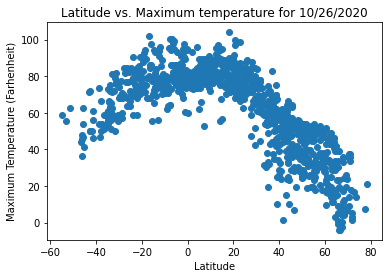

In [35]:
plt.scatter(clean_df['Latitude'], clean_df['Max temp'])
plt.ylabel('Maximum Temperature (Farhenheit)')
plt.xlabel('Latitude')
plt.title(f"Latitude vs. Maximum temperature for {today}")
plt.show()

## Latitude vs. Humidity Plot

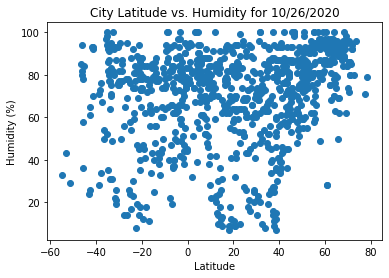

In [13]:
plt.scatter(clean_df['Latitude'], clean_df['Humidity'])
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.title(f'City Latitude vs. Humidity for {today}')
plt.show()

## Latitude vs. Cloudiness Plot

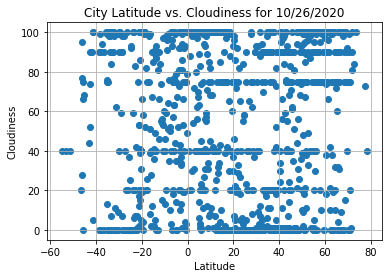

In [14]:
plt.scatter( clean_df['Latitude'], clean_df['Cloudiness'])
plt.ylabel('Cloudiness %')
plt.xlabel('Latitude')
plt.title(f'City Latitude vs. Cloudiness for {today}')
plt.grid()

## Latitude vs. Wind Speed Plot

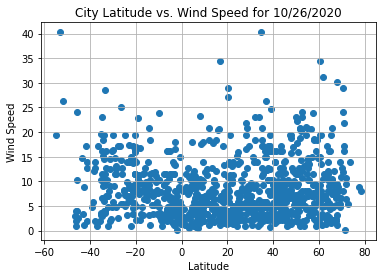

In [15]:
plt.scatter(clean_df['Latitude'], clean_df['Wind Speed'])
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.title(f'City Latitude vs. Wind Speed for {today}')
plt.grid()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

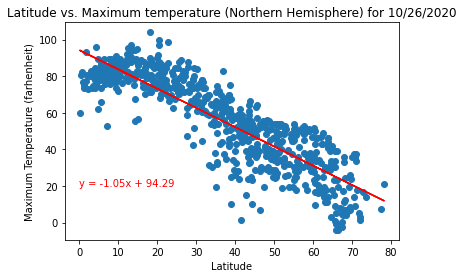

The r-value is : -0.8675747608274443


In [18]:
north_df = clean_df.loc[clean_df['Latitude'] >= 0]
north_slope, north_int, north_r, north_p, north_stderr = stats.linregress(north_df['Latitude'].astype(float), 
                                                                          north_df['Max temp'].astype(float))
north_line = north_slope * north_df['Latitude'] + north_int
north_eq = f'y = {round(north_slope,2)}x + {round(north_int,2)}'
plt.scatter(north_df['Latitude'], north_df['Max temp'])
plt.plot(north_df['Latitude'], north_line, c = 'red')
plt.text(0,20,north_eq,c='red')
plt.ylabel('Maximum Temperature (Farhenheit)')
plt.xlabel('Latitude')
plt.title(f'Latitude vs. Maximum temperature (Northern Hemisphere) for {today}')
plt.show()
print(f'The r-value is : {north_r}')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

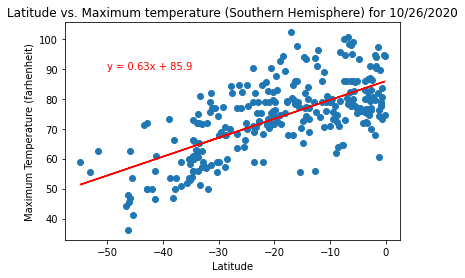

The r-value is : 0.6733726827916717


In [34]:
south_df = clean_df.loc[clean_df['Latitude'] <= 0]
south_slope, south_int, south_r, south_p, south_stderr = stats.linregress(south_df['Latitude'].astype(float), 
                                                                          south_df['Max temp'].astype(float))
south_line = south_slope * south_df['Latitude'] + south_int
south_eq = f'y = {round(south_slope,2)}x + {round(south_int,2)}'
plt.scatter(south_df['Latitude'], south_df['Max temp'])
plt.plot(south_df['Latitude'], south_line, c = 'red')
plt.text(-50,90,south_eq,c='red')
plt.ylabel('Maximum Temperature (Farhenheit)')
plt.xlabel('Latitude')
plt.title(f'Latitude vs. Maximum temperature (Southern Hemisphere) for {today}')
plt.show()
print(f'The r-value is : {south_r}')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

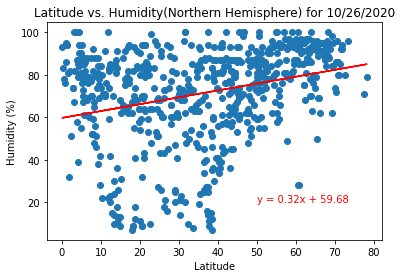

The r-value is : 0.2888134036531498


In [22]:
north_slope, north_int, north_r, north_p, north_stderr = stats.linregress(north_df['Latitude'].astype(float), 
                                                                          north_df['Humidity'].astype(float))
north_line = north_slope * north_df['Latitude'] + north_int
north_eq = f'y = {round(north_slope,2)}x + {round(north_int,2)}'
plt.scatter(north_df['Latitude'], north_df['Humidity'])
plt.plot(north_df['Latitude'], north_line, c = 'red')
plt.text(50,20,north_eq,c='red')
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.title(f'Latitude vs. Humidity(Northern Hemisphere) for {today}')
plt.show()
print(f'The r-value is : {north_r}')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

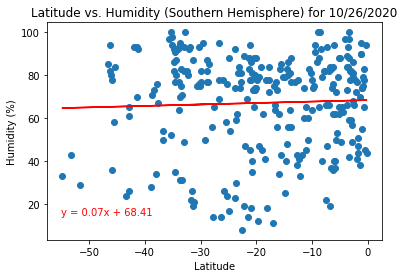

The r-value is : 0.039772645699438655


In [25]:
south_slope, south_int, south_r, south_p, south_stderr = stats.linregress(south_df['Latitude'].astype(float), 
                                                                          south_df['Humidity'].astype(float))
south_line = south_slope * south_df['Latitude'] + south_int
south_eq = f'y = {round(south_slope,2)}x + {round(south_int,2)}'
plt.scatter(south_df['Latitude'], south_df['Humidity'])
plt.plot(south_df['Latitude'], south_line, c = 'red')
plt.text(-55,15,south_eq,c='red')
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.title(f'Latitude vs. Humidity (Southern Hemisphere) for {today}')
plt.show()
print(f'The r-value is : {south_r}')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

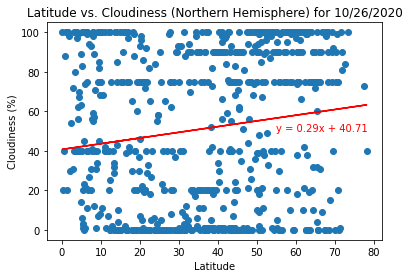

The r-value is : 0.14850724358009573


In [28]:
north_slope, north_int, north_r, north_p, north_stderr = stats.linregress(north_df['Latitude'].astype(float), 
                                                                          north_df['Cloudiness'].astype(float))
north_line = north_slope * north_df['Latitude'] + north_int
north_eq = f'y = {round(north_slope,2)}x + {round(north_int,2)}'
plt.scatter(north_df['Latitude'], north_df['Cloudiness'])
plt.plot(north_df['Latitude'], north_line, c = 'red')
plt.text(55,50,north_eq,c='red')
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.title(f'Latitude vs. Cloudiness (Northern Hemisphere) for {today}')
plt.show()
print(f'The r-value is : {north_r}')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

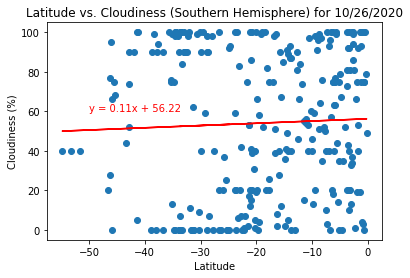

The r-value is : 0.040860949505859966


In [29]:
south_slope, south_int, south_r, south_p, south_stderr = stats.linregress(south_df['Latitude'].astype(float), 
                                                                          south_df['Cloudiness'].astype(float))
south_line = south_slope * south_df['Latitude'] + south_int
south_eq = f'y = {round(south_slope,2)}x + {round(south_int,2)}'
plt.scatter(south_df['Latitude'], south_df['Cloudiness'])
plt.plot(south_df['Latitude'], south_line, c = 'red')
plt.text(-50,60,south_eq,c='red')
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.title(f'Latitude vs. Cloudiness (Southern Hemisphere) for {today}')
plt.show()
print(f'The r-value is : {south_r}')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

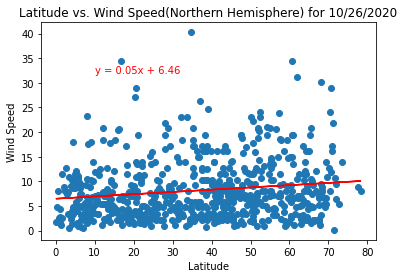

The r-value is : 0.15468014488380535


In [31]:
north_slope, north_int, north_r, north_p, north_stderr = stats.linregress(north_df['Latitude'].astype(float), 
                                                                          north_df['Wind Speed'].astype(float))
north_line = north_slope * north_df['Latitude'] + north_int
north_eq = f'y = {round(north_slope,2)}x + {round(north_int,2)}'
plt.scatter(north_df['Latitude'], north_df['Wind Speed'])
plt.plot(north_df['Latitude'], north_line, c = 'red')
plt.text(10,32,north_eq,c='red')
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.title(f'Latitude vs. Wind Speed(Northern Hemisphere) for {today}')
plt.show()
print(f'The r-value is : {north_r}')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

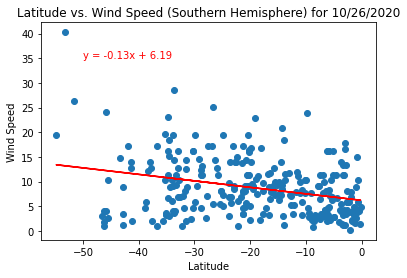

The r-value is : -0.2976545670690329


In [33]:
south_slope, south_int, south_r, south_p, south_stderr = stats.linregress(south_df['Latitude'].astype(float), 
                                                                          south_df['Wind Speed'].astype(float))
south_line = south_slope * south_df['Latitude'] + south_int
south_eq = f'y = {round(south_slope,2)}x + {round(south_int,2)}'
plt.scatter(south_df['Latitude'], south_df['Wind Speed'])
plt.plot(south_df['Latitude'], south_line, c = 'red')
plt.text(-50,35,south_eq,c='red')
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.title(f'Latitude vs. Wind Speed (Southern Hemisphere) for {today}')
plt.show()
print(f'The r-value is : {south_r}')